In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from sklearn.datasets import load_iris, fetch_openml

In [ ]:
sns.set(style='whitegrid')
np.random.seed(42)

--------------------
# Section 1: Basics - Covariance
--------------------

In [4]:
# Exercise 1: Covariance calculation
X = np.array([2, 4, 6, 8, 10])
Y = np.array([1, 3, 5, 7, 9])
cov_XY = np.cov(X, Y)[0, 1]
print("Covariance X,Y:", cov_XY)

Covariance X,Y: 10.0


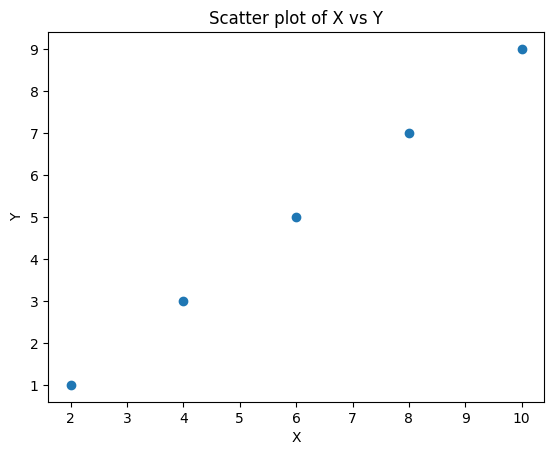

In [5]:
# Exercise 2: Scatter plot
plt.scatter(X, Y)
plt.title("Scatter plot of X vs Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

--------------------
# Section 2: Pearson Correlation
--------------------

In [6]:
# Exercise 3: Linear relationship with random noise
X = np.random.randint(1, 20, 10)
Y = 3*X + np.random.randint(-5, 5, 10)
r, _ = pearsonr(X, Y)
print("Pearson correlation:", r)

Pearson correlation: 0.9896616968383114


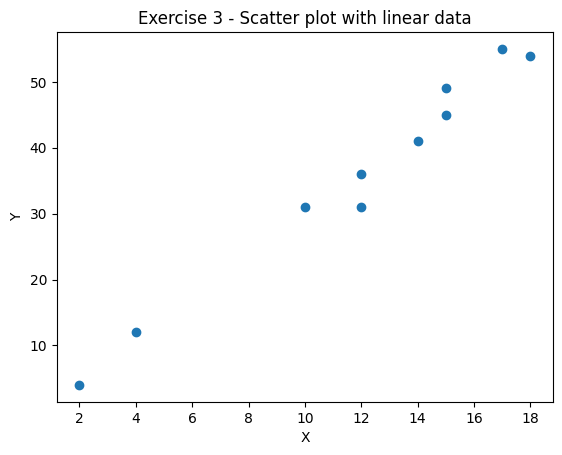

In [7]:
plt.scatter(X, Y)
plt.title("Exercise 3 - Scatter plot with linear data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [8]:
# Exercise 4: DataFrame correlation matrix
data = {'Height': [150, 160, 170, 180, 190],
'Weight': [50, 60, 65, 80, 90],
'Age': [20, 25, 30, 35, 40]}
df = pd.DataFrame(data)
print("Covariance Matrix:\n", df.cov())
print("\nPearson Correlation Matrix:\n", df.corr())

Covariance Matrix:
         Height  Weight    Age
Height   250.0   250.0  125.0
Weight   250.0   255.0  125.0
Age      125.0   125.0   62.5

Pearson Correlation Matrix:
           Height    Weight       Age
Height  1.000000  0.990148  1.000000
Weight  0.990148  1.000000  0.990148
Age     1.000000  0.990148  1.000000


--------------------
# Section 3: Spearman Correlation
--------------------

In [9]:
# Exercise 5: Non-linear monotonic data
X = np.array([1, 2, 3, 4, 5])
Y = np.array([2, 4, 8, 16, 32])

In [10]:
spearman_corr = spearmanr(X, Y)[0]
pearson_corr = pearsonr(X, Y)[0]
print("Spearman correlation:", spearman_corr)
print("\nPearson correlation:", pearson_corr)

Spearman correlation: 0.9999999999999999

Pearson correlation: 0.9332565252573829


In [11]:
# Exercise 6: Effect of outliers
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([2, 4, 6, 8, 10, 50]) # Outlier
print("Pearson with outlier:", pearsonr(X, Y)[0])
print("\nSpearman with outlier:", spearmanr(X, Y)[0])

Pearson with outlier: 0.7642652566278798

Spearman with outlier: 1.0


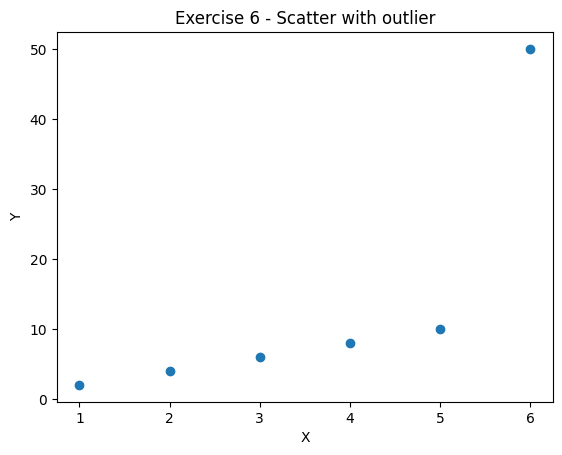

In [12]:
plt.scatter(X, Y)
plt.title("Exercise 6 - Scatter with outlier")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

--------------------
# Section 4: Real Dataset Practice - Iris
--------------------

In [13]:
iris = load_iris()

In [14]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [15]:
# Pearson correlation
pearson_iris = df_iris.corr()
print("Pearson Correlation - Iris:\n", pearson_iris)

Pearson Correlation - Iris:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [16]:
# Spearman correlation
spearman_iris = df_iris.corr(method='spearman')
print("\nSpearman Correlation - Iris:\n", spearman_iris)


Spearman Correlation - Iris:
                    sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.166778           0.881898   
sepal width (cm)           -0.166778          1.000000          -0.309635   
petal length (cm)           0.881898         -0.309635           1.000000   
petal width (cm)            0.834289         -0.289032           0.937667   

                   petal width (cm)  
sepal length (cm)          0.834289  
sepal width (cm)          -0.289032  
petal length (cm)          0.937667  
petal width (cm)           1.000000  


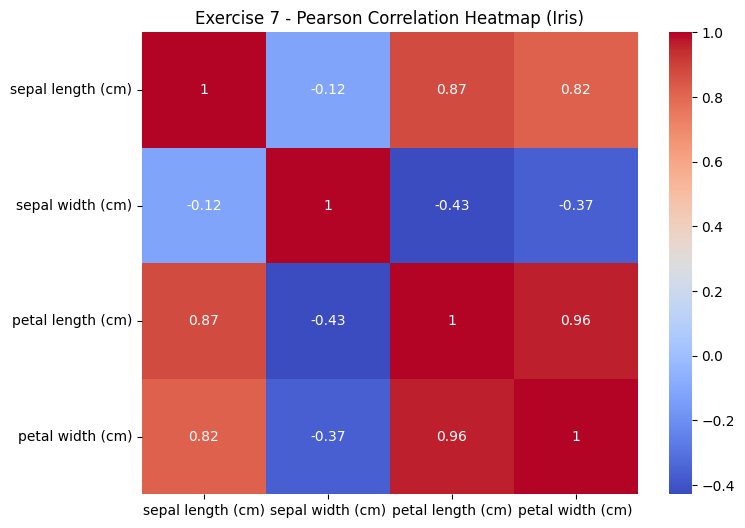

In [17]:
# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(pearson_iris, annot=True, cmap='coolwarm')
plt.title("Exercise 7 - Pearson Correlation Heatmap (Iris)")
plt.show()

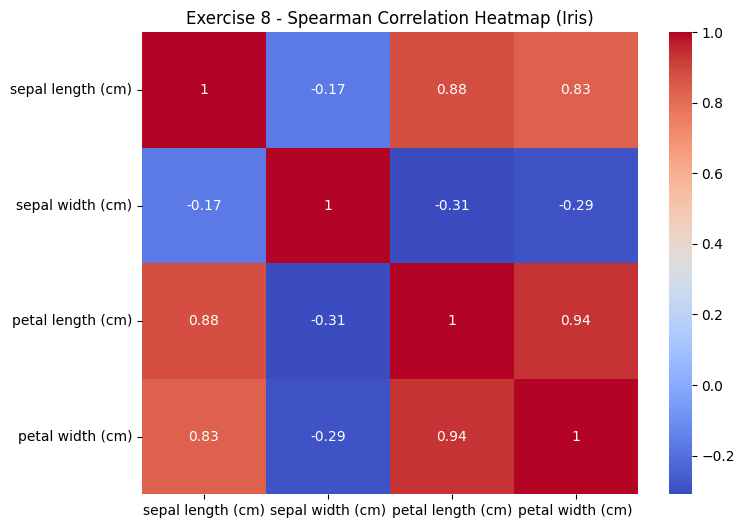

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(spearman_iris, annot=True, cmap='coolwarm')
plt.title("Exercise 8 - Spearman Correlation Heatmap (Iris)")
plt.show()

--------------------
# Section 5: Titanic Dataset Practice
--------------------

Pearson Correlation - Titanic:
              age      fare    pclass
age     1.000000  0.178739 -0.411086
fare    0.178739  1.000000 -0.565255
pclass -0.411086 -0.565255  1.000000

Spearman Correlation - Titanic:
              age      fare    pclass
age     1.000000  0.192676 -0.398107
fare    0.192676  1.000000 -0.751438
pclass -0.398107 -0.751438  1.000000


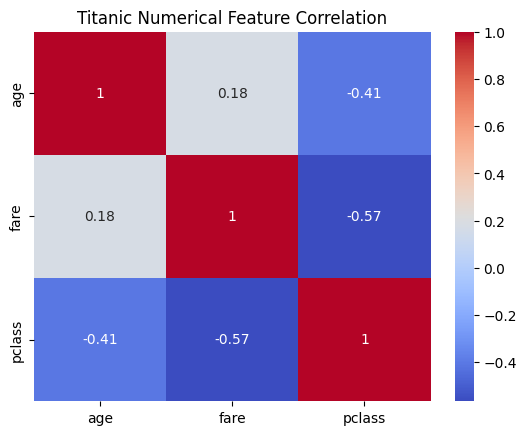

In [20]:
try:
    titanic = fetch_openml('titanic', version=1, as_frame=True)
    df_titanic = titanic.frame
    df_num = df_titanic[['age', 'fare', 'pclass']].dropna()


    print("Pearson Correlation - Titanic:\n", df_num.corr())
    print("\nSpearman Correlation - Titanic:\n", df_num.corr(method='spearman'))


    sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm')
    plt.title("Titanic Numerical Feature Correlation")
    plt.show()
except Exception as e:
    print("Titanic dataset not available.", e)

--------------------
# Section 6: Challenge Exercises
--------------------

In [21]:
# Challenge 1: Random datasets with different correlations
X = np.random.rand(100)
Y = X**2 # Non-linear but monotonic
Z = np.random.rand(100) # Random noise

In [22]:
print("Challenge 1 - Pearson X,Y:", pearsonr(X, Y)[0])

Challenge 1 - Pearson X,Y: 0.9664564177017674


In [23]:
print("Challenge 1 - Spearman X,Y:", spearmanr(X, Y)[0])

Challenge 1 - Spearman X,Y: 0.9999999999999999


In [24]:
print("Challenge 1 - Pearson X,Z:", pearsonr(X, Z)[0])

Challenge 1 - Pearson X,Z: -0.19221040932154976


In [25]:
print("Challenge 1 - Spearman X,Z:", spearmanr(X, Z)[0])

Challenge 1 - Spearman X,Z: -0.17598559855985596


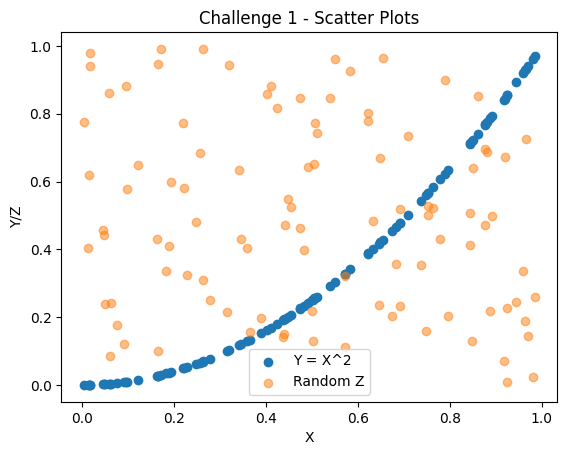

In [26]:
plt.scatter(X, Y, label='Y = X^2')
plt.scatter(X, Z, label='Random Z', alpha=0.5)
plt.title("Challenge 1 - Scatter Plots")
plt.xlabel("X")
plt.ylabel("Y/Z")
plt.legend()
plt.show()

In [27]:
# Challenge 2: Time-series correlation
time = np.arange(1, 21)
data1 = time + np.random.randn(20)
data2 = time*2 + np.random.randn(20)*2

In [28]:
pearson_time = pearsonr(data1, data2)[0]
spearman_time = spearmanr(data1, data2)[0]
print("Challenge 2 - Pearson time-series:", pearson_time)
print("Challenge 2 - Spearman time-series:", spearman_time)

Challenge 2 - Pearson time-series: 0.9753701606740097
Challenge 2 - Spearman time-series: 0.9819548872180449


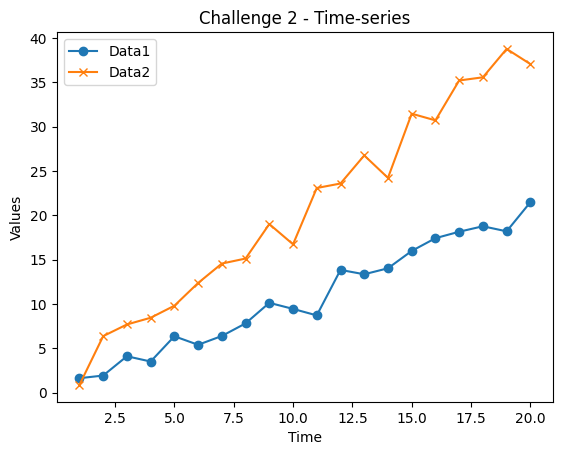

In [29]:
plt.plot(time, data1, marker='o', label='Data1')
plt.plot(time, data2, marker='x', label='Data2')
plt.title("Challenge 2 - Time-series")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()